In [4]:
import ioutils 
from esm.models.esm3 import ESM3
from esm.sdk.api import ESMProtein, GenerationConfig
import torch
model = ESM3.from_pretrained("esm3_sm_open_v1", device="cpu")

/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import json 
import trainUtils
with open("/home/tyfei/evoModel/checkpoints/trainAutoEncoderFull_li/config.json") as f:
    configs = json.load(f)

In [3]:
pretrain_model = trainUtils.loadPretrainModel(configs)
model = trainUtils.buildModel(configs, pretrain_model, None)
ds = trainUtils.loadDataset(configs)

Seed set to 1509


In [33]:
ckpt = torch.load("/home/tyfei/evoModel/checkpoints/trainAutoEncoderFull_li/epoch=12-validate_loss=1.53.ckpt")
ckpt

{'epoch': 12,
 'global_step': 15600,
 'pytorch-lightning_version': '2.3.3',
 'state_dict': OrderedDict([('esm_model.transformer.blocks.0.attn.layernorm_qkv.1.lora.A',
               tensor([[ 2.0858e-05,  5.2094e-06, -1.1601e-04,  1.0138e-05],
                       [ 1.0572e-01,  3.0452e-03,  4.5939e-01, -1.5189e-05],
                       [ 3.1575e-05,  1.5313e-01,  1.9042e-05,  4.7887e-06],
                       ...,
                       [-2.1488e-05,  1.2336e-05,  7.2122e-06,  6.3239e-01],
                       [-2.0793e-05,  2.9086e-05,  9.4686e-02,  2.7488e-02],
                       [ 5.6313e-05, -5.7525e-05,  5.3507e-06,  2.7125e-05]], device='cuda:7')),
              ('esm_model.transformer.blocks.0.attn.layernorm_qkv.1.lora.B',
               tensor([[-7.9149e-07, -2.8739e-05, -2.3795e-05,  ...,  3.0210e-03,
                        -2.7583e-04,  2.3948e-04],
                       [-1.3611e-06, -1.3896e-05,  2.2899e-06,  ..., -3.5300e-04,
                         6.2742

In [34]:
model.load_state_dict(ckpt["state_dict"], strict=False)
model = model.cuda(5)

In [35]:
d = ds.val_dataloader()
q = []
labels = ["S"]*100+["NSP5"]*100+["E"]*100
with torch.no_grad():
    for i, j in enumerate(d):
        inputs = j[0]
        # labels.append(j[0]["prot"])
        j[0]["seq_t"] = j[0]["seq_t"].cuda(5)
        res = model(j[0]).cpu().squeeze().numpy()
        q.append(res)
    # break

get val loader


In [36]:
from sklearn.decomposition import PCA
import numpy as np
q = np.stack(q, axis=0)
pca = PCA(n_components=20)
pca_seq = pca.fit_transform(q)
pca_seq.shape 
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(pca_seq)

In [37]:
X_embedded.shape

(960, 2)

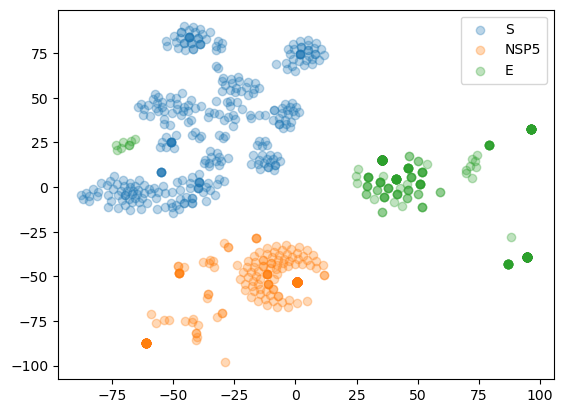

In [38]:
import pandas as pd
import matplotlib.pyplot as plt 
labels = ["S"]*320+["NSP5"]*320+["E"]*320
df = pd.DataFrame({"x": X_embedded[:, 0], "y": X_embedded[:, 1], "labels": labels})
for i in ["S", "NSP5", "E"]:
    subdf = df[df["labels"] == i]
    plt.scatter(subdf["x"], subdf["y"], label=i, alpha=0.3)
plt.legend()

In [27]:
ori = {}

In [28]:
import pickle 
with open("/data/tyfei/datasets/covid/S_aln.pkl", "rb") as f:
    a = pickle.load(f) 
ori["S"] = a[0]["seq_t"]
with open("/data/tyfei/datasets/covid/E_aln.pkl", "rb") as f:
    a = pickle.load(f) 
ori["E"] = a[0]["seq_t"]
with open("/data/tyfei/datasets/covid/NSP5_aln.pkl", "rb") as f:
    a = pickle.load(f) 
ori["NSP5"] = a[0]["seq_t"]

In [33]:
with open("/data/tyfei/datasets/covid/S_aln.pkl", "rb") as f:
    a = pickle.load(f) 
a

[{'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,

In [37]:
a[512]["seq_t"].shape, a[0]["seq_t"].shape

((1273,), (1275,))

In [30]:
with open("/data/tyfei/datasets/covid/ori_seq.pkl", "wb") as f:
    pickle.dump(ori, f)

In [27]:
q = [] 
res = model(j[0])
res.shape

torch.Size([1, 256])

In [41]:
seqs = ioutils.readFasta("/data/tyfei/datasets/covid/S_20211206_20241005.aln.fa")
# seqs

In [42]:
res = []
for i in range(0, 513):
    res.append(next(seqs))
    

In [ ]:
len(res[0][1]), len(res[512][1])


(1273, 1271)

In [44]:
res[0][1], res[512][1]

('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLIT

In [ ]:
get_time = ioutils.getDate()
allres = [] 
cnt = 0
for seq in seqs:
    if (cnt+1) % 100000 == 0:
        print(cnt)
    # if cnt > 6000000:
    #     break
    cnt += 1
    # print(seq)
    # info = seq[0].split("|")
    # if not info[3].startswith("EPI"):
    #     continue
    # if info[0] not in ["E", "NSP5", "Spike"]:
    #       continue
    protein = ESMProtein(sequence=seq[1])
    res = model.encode(protein)
    data = {}
    data["prot"] = "E"
    # data["date"] = get_time(info[2])
    # data["country"] = info[-1]
    # data["id"] = info[3]
    data["seq_t"] = res.sequence.cpu().numpy()
    allres.append(data)
    # print(data)
    # break

99999
199999
299999
399999
499999
599999
699999
799999


In [21]:
import pickle 
for i in ("/data/tyfei/datasets/covid/E_aln.pkl", "/data/tyfei/datasets/covid/NSP5_aln.pkl", "/data/tyfei/datasets/covid/S_aln.pkl"):
    with open(i, "rb") as f:
        a = pickle.load(f)
        print(len(a))

833661
923737
1947288


In [16]:
len(allres)

833661

In [51]:
len(res)

78